In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
print('Libraries import sucessflly')

Libraries import sucessflly


In [3]:
Tdata=pd.read_csv('Telcom_Customer_Churn.csv')
Tdata.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
## https://drive.google.com/open?id=1vmVKLJc3iLw-svANZd3v6iTNxdjOXfM_
## Source of Data : https://www.kaggle.com/blastchar/telco-customer-churn


In [6]:
print('Rows    :',Tdata.shape[0])
print('Columns :',Tdata.shape[1])

Rows    : 7043
Columns : 21


In [9]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    
    df_U=df_U.rename(columns={0:'Unique Data'})
    df_M=df_M.rename(columns={0:'Missing Data'})
    df_I=df_I.rename(columns={0:'Data Types'})
    
    output=pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output


In [10]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


In [12]:
Tdata.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [13]:
Tdata.TotalCharges=pd.to_numeric(Tdata.TotalCharges,errors='coerce')
Tdata.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [14]:
Tdata.drop('customerID',axis=1,inplace=True)
Tdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
Num_Cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_Cols=Tdata.select_dtypes(include=['object']).columns.tolist()

In [16]:
Tdata[Num_Cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
Tdata[Num_Cols]=Tdata[Num_Cols].fillna(Tdata[Num_Cols].mean())
Tdata[Num_Cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

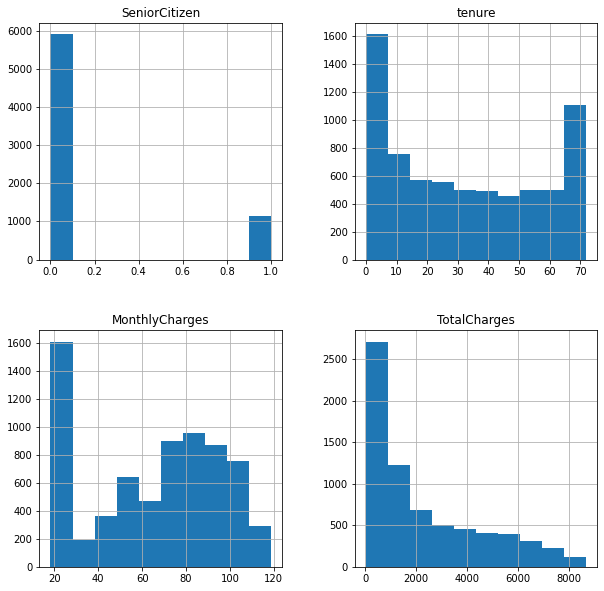

In [19]:
Tdata[Num_Cols].hist(figsize=(10,10))

In [20]:
def cat_col_desc(data):
    col_list=data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list:
        print("Variable :",i)
        print("count of unique values :",len(set(data[i])))
        print("Unique value :",set(data[i]))
        print("=========================")
        

In [21]:
cat_col_desc(Tdata)

Variable : gender
count of unique values : 2
Unique value : {'Female', 'Male'}
Variable : Partner
count of unique values : 2
Unique value : {'No', 'Yes'}
Variable : Dependents
count of unique values : 2
Unique value : {'No', 'Yes'}
Variable : PhoneService
count of unique values : 2
Unique value : {'No', 'Yes'}
Variable : MultipleLines
count of unique values : 3
Unique value : {'Yes', 'No', 'No phone service'}
Variable : InternetService
count of unique values : 3
Unique value : {'DSL', 'Fiber optic', 'No'}
Variable : OnlineSecurity
count of unique values : 3
Unique value : {'No', 'No internet service', 'Yes'}
Variable : OnlineBackup
count of unique values : 3
Unique value : {'No', 'No internet service', 'Yes'}
Variable : DeviceProtection
count of unique values : 3
Unique value : {'No', 'No internet service', 'Yes'}
Variable : TechSupport
count of unique values : 3
Unique value : {'No', 'No internet service', 'Yes'}
Variable : StreamingTV
count of unique values : 3
Unique value : {'No', 

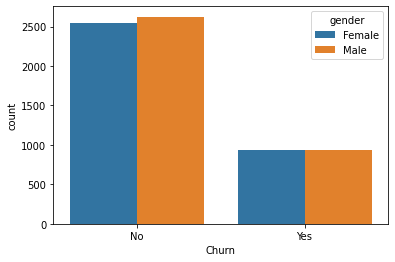

In [22]:
sns.countplot(x='Churn',hue='gender',data=Tdata);


In [26]:
Binary_class=Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique()==2].keys().tolist()
print(Binary_class)
print("============================")
print("----------------------------")
Multi_class=Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique()>2].keys().tolist()
print(Multi_class)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
----------------------------
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


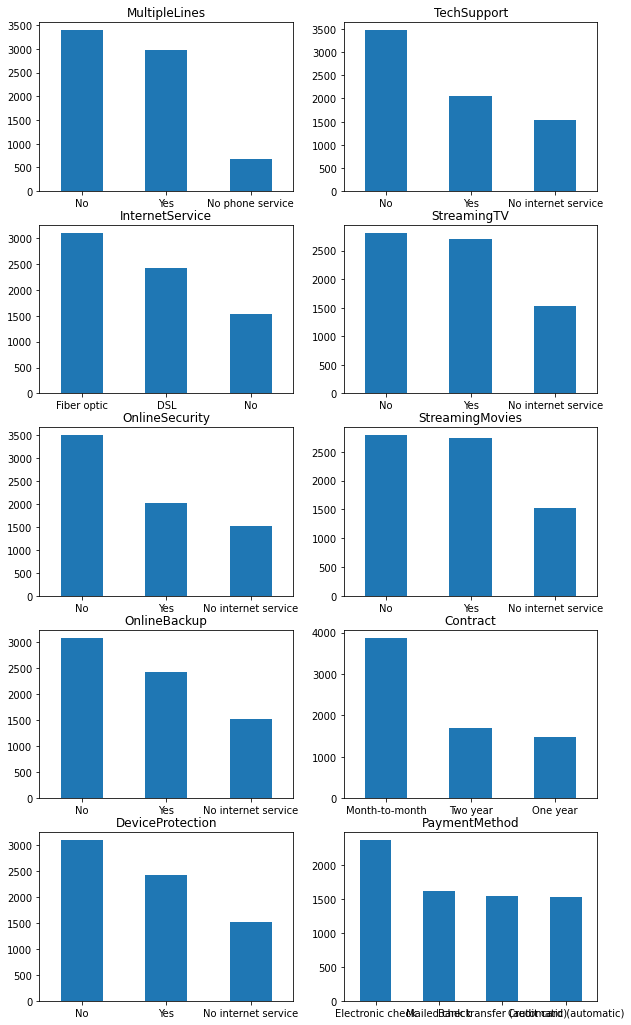

In [30]:
fif,axes=plt.subplots(nrows=5,ncols=2,figsize=(10,18))
for i,item in enumerate(Multi_class):
    if i<5:
        ax=Tdata[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
    elif i>=5:
        ax=Tdata[item].value_counts().plot(kind='bar',ax=axes[i-5,1],rot=0)
    ax.set_title(item)
                                                                

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])

In [32]:
Tdata[Binary_class].shape

(7043, 6)

In [33]:
Tdata[Binary_class].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [35]:
#one Hot encoding
Tdata_dummy=pd.get_dummies(Tdata[Multi_class])
Tdata_dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [37]:
final_df=pd.concat([Tdata[Num_Cols],Tdata[Binary_class],Tdata_dummy],axis=1)
final_df.shape

(7043, 41)

0    5174
1    1869
Name: Churn, dtype: int64


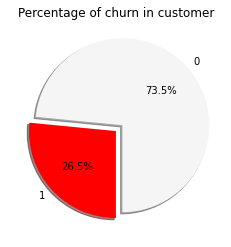

In [42]:
labels=final_df['Churn'].value_counts(sort=True).index
sizes=final_df['Churn'].value_counts(sort=True)
print(sizes)
colors=['whitesmoke','red']
explode=(0.1,0) # only explode 1st slice 
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=270)
plt.title("Percentage of churn in customer")
plt.show()

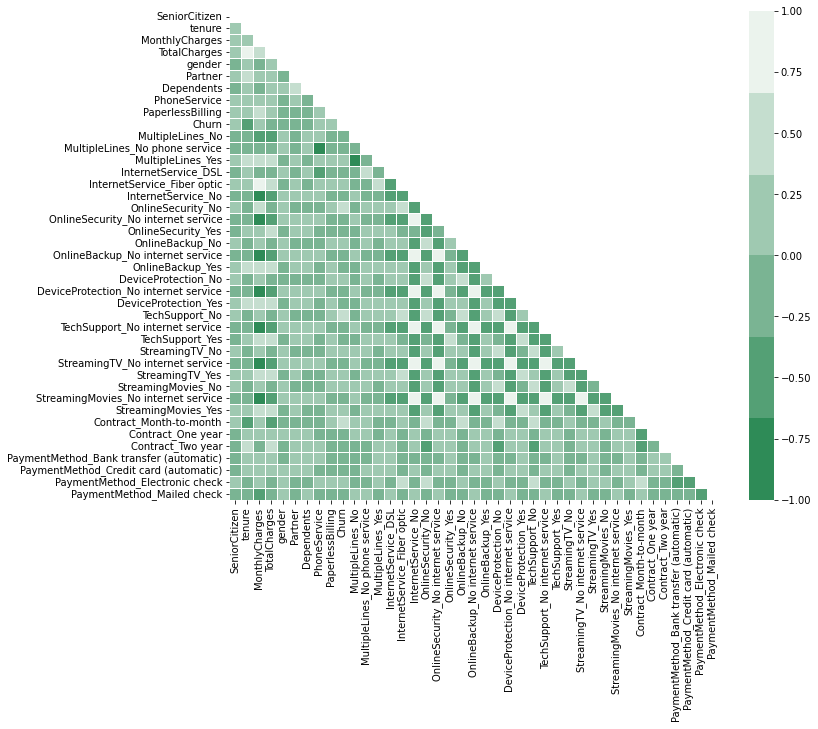

In [45]:
corr=final_df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.light_palette("seagreen",reverse=True)
sns.heatmap(corr,cmap=cmap,center=0,square=True,linewidths=.5,mask=mask);

In [46]:
Tdata.corr().style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000


In [47]:
from sklearn.model_selection import train_test_split
X=final_df.drop(['Churn'],axis=1)
y=final_df["Churn"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
print('The number of samples into the train data is {}'.format(X_train.shape[0]))
print('The number of samples into the test data is {}'.format(X_test.shape[0]))

The number of samples into the train data is 5634
The number of samples into the test data is 1409


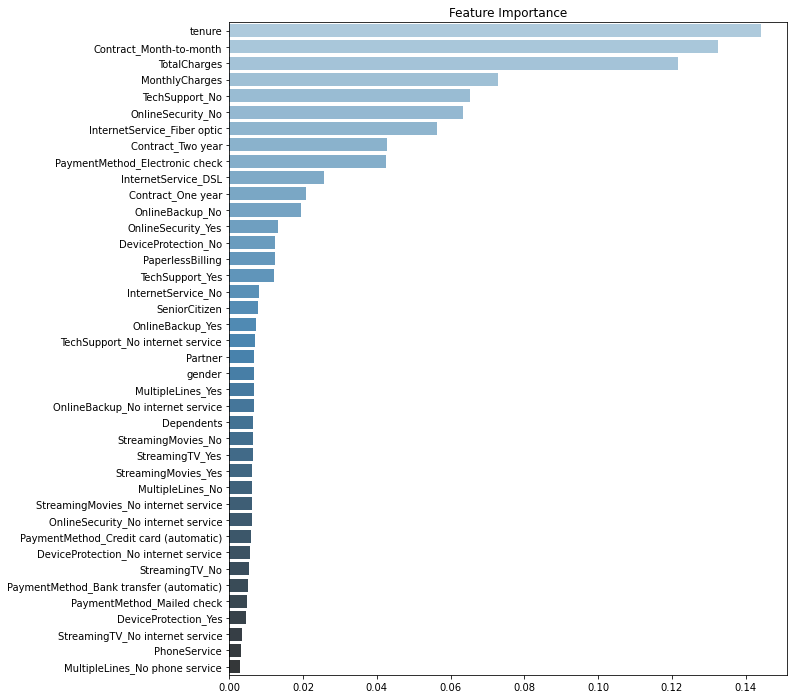

In [51]:
from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}
clf=RandomForestClassifier(**params)
clf=clf.fit(X,y)
imp=pd.Series(data=clf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
ax=sns.barplot(y=imp.index,x=imp.values,palette='Blues_d',orient='h')


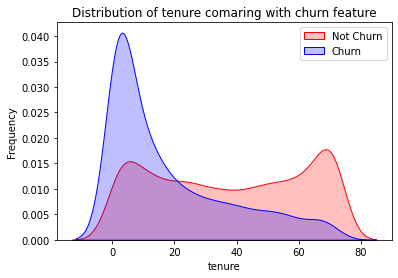

In [53]:
# tenure Distribution
g=sns.kdeplot(final_df.tenure[(final_df['Churn']==0)],color="Red",shade=True)
g=sns.kdeplot(final_df.tenure[(final_df['Churn']==1)],ax=g,color="Blue",shade=True)

g.set_xlabel("tenure")
g.set_ylabel("Frequency")

plt.title("Distribution of tenure comaring with churn feature")
g=g.legend(["Not Churn","Churn"])

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
accuracy=logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is ",accuracy*100)
from sklearn.metrics import f1_score
f1=f1_score(logistic_model.predict(X_test),y_test)
print("f1 score =",f1)

Logistic Regression accuracy is  81.19233498935415
f1 score = 0.6062407132243685


In [56]:
from sklearn.metrics import confusion_matrix
y_pred=logistic_model.predict(X_test)
cm_lr=confusion_matrix(y_test,y_pred)
print(cm_lr)

[[940 121]
 [144 204]]


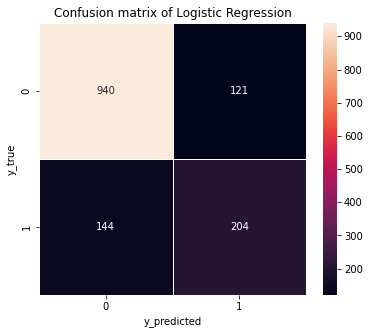

In [59]:
f,ax=plt.subplots(figsize=(6,5))
sns.heatmap(cm_lr,annot=True,linewidth=0.5,color="red",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion matrix of Logistic Regression")
plt.show()